<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/o_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network tiny example

Let's create a CNN to recognize X or O shapes in a 9 x 9 pixel image and visualize convolutional filters and filtered images.

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.losses import mean_squared_error
from keras.utils import img_to_array

In [38]:
# some constants
image_size = 18

In [67]:
# building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss=mean_squared_error, metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 18, 18, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 18, 18, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 9, 9, 32)          0         
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 9, 9, 64)          36928     
                                                      

In [4]:
!wget -q -O o_x.png https://github.com/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/data/o_x.png?raw=true

In [5]:
# load all train and test as one image
img = Image.open('o_x.png').convert('L')

In [40]:
# training and test data
labels = ['O', 'X']
X_train = np.zeros((100, image_size, image_size), dtype='float32')
y_train = np.zeros(100, dtype='float32')
y_train[50:] = 1
X_test = np.zeros((40, image_size ,image_size), dtype='float32')
y_test = np.zeros(40, dtype='float32')
y_test[20:] = 1

float32


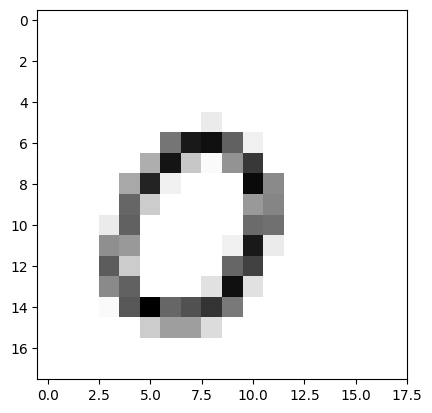

In [41]:
w = img_to_array(img.crop((2, 2, 116, 116)).resize((18,18)))[:,:,0]
#w = w.resize((9,9))
#w = img_to_array(w)[:,:,0]
print(w.dtype)
plt.imshow(w, cmap='gray')

In [51]:
# create train images
size = 118      # original size of a marker
border = 4
k = 0
for i in range(10):     # rows
    pixel_top = i * size + border
    pixel_bot = (i + 1) * size - border
    for j in range(10): # columns
        pixel_left = j * size + border
        pixel_righ = (j + 1) * size - border
        box = (pixel_left, pixel_top, pixel_righ, pixel_bot)
        sub_img = img_to_array(img.crop(box).resize((image_size, image_size)))[:,:,0]
        X_train[k] = sub_img
        k += 1

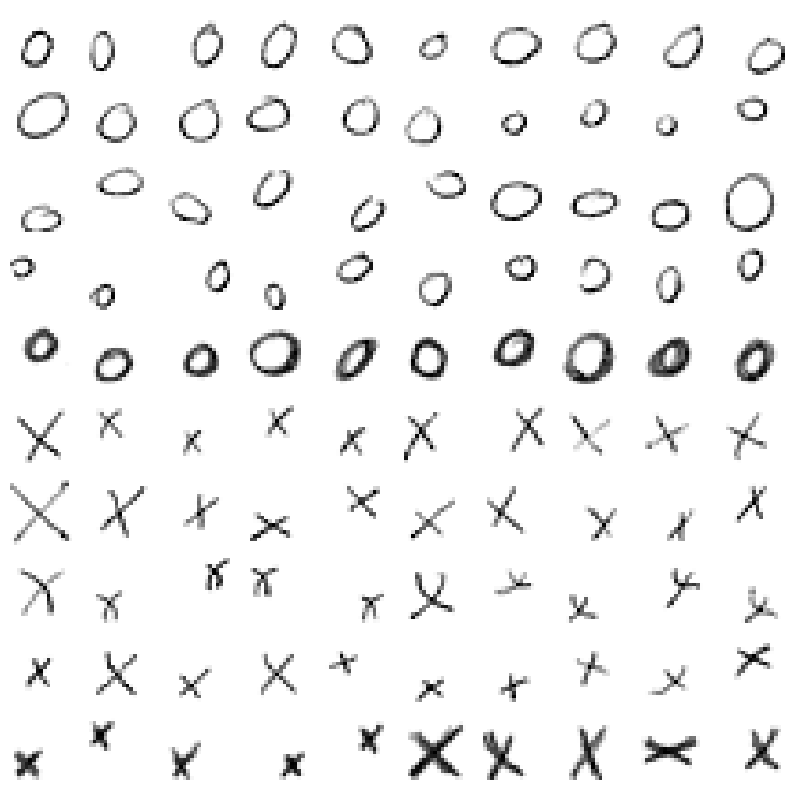

In [52]:
# show train images
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
ax = ax.ravel()
for i in range(100):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [53]:
# create test images
size = 118
border = 5
k = 0
for i in range(12, 16):    # rows
    pixel_top = i * size + border
    pixel_bot = (i + 1) * size - border
    print(i)
    for j in range(10): # columns
        pixel_left = j * size + border
        pixel_righ = (j + 1) * size - border
        box = (pixel_left, pixel_top, pixel_righ, pixel_bot)
        sub_img = img_to_array(img.crop(box).resize((image_size, image_size)))[:,:,0]
        X_test[k] = sub_img
        k += 1

12
13
14
15


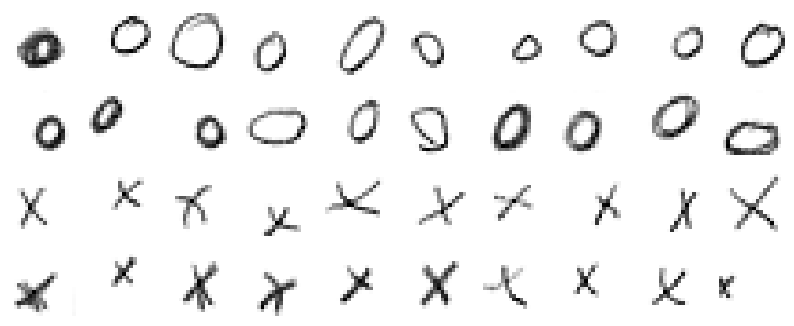

In [54]:
# show test images
fig, ax = plt.subplots(4,10, figsize=(10, 4))
ax = ax.ravel()
for i in range(40):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].axis('off')

In [68]:
%%time
epochs = 40
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/40
4/4 [==============================] - 2s 118ms/step - loss: 0.4978 - accuracy: 0.5200 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 0s 47ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 3/40
4/4 [==============================] - 0s 53ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 4/40
4/4 [==============================] - 0s 49ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 5/40
4/4 [==============================] - 0s 47ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 6/40
4/4 [==============================] - 0s 46ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 7/40
4/4 [==============================] - 0s 48ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 8/40
4/4 [==========

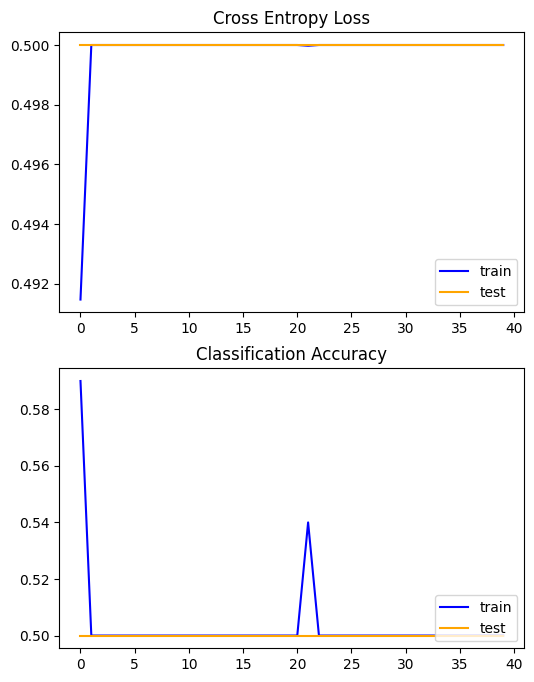

In [66]:
# plot diagnostic learning curves and optionaly save to file
def summarize_diagnostics(history, filename=None):
    # if file name given curves are saved to file and not displayed on screen
    fig, ax = plt.subplots(2, 1, figsize=(6, 8))
    ax[0].set_title('Cross Entropy Loss')
    ax[0].plot(history.history['loss'], color='blue', label='train')
    ax[0].plot(history.history['val_loss'], color='orange', label='test')
    ax[0].legend()
    # plot accuracy
    #plt.subplot(212)
    ax[1].set_title('Classification Accuracy')
    ax[1].plot(history.history['accuracy'], color='blue', label='train')
    ax[1].plot(history.history['val_accuracy'], color='orange', label='test')
    ax[1].legend(loc=4)
    plt.subplots_adjust(wspace=0.5)
    if filename:
        # save plot to file
        pyplot.savefig(filename + '_plot.png')
        pyplot.close()

summarize_diagnostics(history)